# Method defs BEGINNER

Esta tabla contiene la información de las funciones definidas dentro de una clase (métodos). Cada entrada en esta tabla tiene una entrada en la tabla functiondef con el resto de información.

## 1 - Obtencion de datos

In [2]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

TARGET_FEATURE = 'methoddef__expertise_level'
TARGET_CLASS = 'BEGINNER'
full_table = get_data('methoddefs')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "PROFESSIONAL"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for PROFESSIONAL class.")

2025-01-28 11:18:52.010598 Data cache files found ...
2025-01-28 11:18:52.050936 Data cache files successfully loaded!!
The dataset contains 462 (2.878%) instances for BEGINNER class and 15589 (97.12%) for PROFESSIONAL class.


In [3]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'methoddefs'
TABLE_FEATURES = ['methoddef__is_class_method', 'methoddef__is_static_method', 'methoddef__is_constructor_method', 'methoddef__is_abstract_method', 'methoddef__is_property', 'methoddef__is_wrapper', 'methoddef__is_cached', 'methoddef__expertise_level', 'functiondef__name_convention', 'functiondef__number_of_characters', 'functiondef__is_magic', 'functiondef__is_private', 'functiondef__body_count', 'functiondef__expressions_pct', 'functiondef__is_async', 'functiondef__number_of_decorators', 'functiondef__has_return_type_annotation', 'functiondef__has_doc_string', 'functiondef__height', 'functiondef__type_annotations_pct']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

Features shape: (462, 20)
As we can see the downloaded data contains a total of 462 instances. For each instance we have 20 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [4]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 462 entries, 2328 to 16050
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   methoddef__is_class_method               462 non-null    bool   
 1   methoddef__is_static_method              462 non-null    bool   
 2   methoddef__is_constructor_method         462 non-null    bool   
 3   methoddef__is_abstract_method            462 non-null    bool   
 4   methoddef__is_property                   462 non-null    bool   
 5   methoddef__is_wrapper                    462 non-null    bool   
 6   methoddef__is_cached                     462 non-null    bool   
 7   methoddef__expertise_level               462 non-null    object 
 8   functiondef__name_convention             462 non-null    object 
 9   functiondef__number_of_characters        462 non-null    int64  
 10  functiondef__is_magic                    462 non-n

Cómo podemos ver la tabla está compuesta por 12 variables boleanas, 6 numéricas y 2 de tipo objeto.

### 2.1 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [5]:
X.isnull().sum()

methoddef__is_class_method                 0
methoddef__is_static_method                0
methoddef__is_constructor_method           0
methoddef__is_abstract_method              0
methoddef__is_property                     0
methoddef__is_wrapper                      0
methoddef__is_cached                       0
methoddef__expertise_level                 0
functiondef__name_convention               0
functiondef__number_of_characters          0
functiondef__is_magic                      0
functiondef__is_private                    0
functiondef__body_count                    0
functiondef__expressions_pct               0
functiondef__is_async                      0
functiondef__number_of_decorators          0
functiondef__has_return_type_annotation    0
functiondef__has_doc_string                0
functiondef__height                        0
functiondef__type_annotations_pct          0
dtype: int64

In [6]:
print_empty_cols(X)

methoddef__is_class_method
--------------------------
0 instancias no tienen un valor para la columna methoddef__is_class_method


methoddef__is_static_method
---------------------------
0 instancias no tienen un valor para la columna methoddef__is_static_method


methoddef__is_constructor_method
--------------------------------
0 instancias no tienen un valor para la columna methoddef__is_constructor_method


methoddef__is_abstract_method
-----------------------------
0 instancias no tienen un valor para la columna methoddef__is_abstract_method


methoddef__is_property
----------------------
0 instancias no tienen un valor para la columna methoddef__is_property


methoddef__is_wrapper
---------------------
0 instancias no tienen un valor para la columna methoddef__is_wrapper


methoddef__is_cached
--------------------
0 instancias no tienen un valor para la columna methoddef__is_cached


methoddef__expertise_level
--------------------------
0 instancias no tienen un valor para la colu

### 2.2 - Describimos los valores de las variables de la tabla.

In [7]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
methoddef__is_class_method,462,2,False,460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_static_method,462,2,False,450,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_constructor_method,462,2,False,353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_abstract_method,462,1,False,462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_property,462,2,False,456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_wrapper,462,1,False,462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_cached,462,1,False,462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__expertise_level,462,1,BEGINNER,462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__name_convention,462,5,SnakeCase,269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__number_of_characters,462.0,NaN,NaN,NaN,10.201299,5.454262,1.0,7.0,8.0,12.0,37.0


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [8]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "functiondef__expressions_pct": [(0.0, 0.0), (0.0, 0.5), (0.5, inf)], # min: 0 ; max: 1
    "functiondef__number_of_decorators": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 7
    "functiondef__type_annotations_pct": [(0.0, 0.0), (0.0, 0.5), (0.5, inf)], # min: 0 ; max: 1
    "functiondef__number_of_characters": [(1.0, 8.0), (8.0, 10), (10, 16), (16, inf)], # min: 1 ; max: 74
    "functiondef__body_count": [(0.0, 1.0), (1.0, 2.0), (2.0, 2.0), (2.0, inf)], # min: 1 ; max: 364
    "functiondef__height": [(0.0, 2.0), (2.0, inf)], # min: 2 ; max: 7
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['methoddef__is_class_method'], 10))
print(get_statistics(X_copy, ['methoddef__is_static_method'], 10))
print(get_statistics(X_copy, ['methoddef__is_constructor_method'], 10))
print(get_statistics(X_copy, ['methoddef__is_abstract_method'], 10))
print(get_statistics(X_copy, ['methoddef__is_property'], 10))
print(get_statistics(X_copy, ['methoddef__is_wrapper'], 10))
print(get_statistics(X_copy, ['methoddef__is_cached'], 10))
print(get_statistics(X_copy, ['functiondef__expressions_pct'], 10))
print(get_statistics(X_copy, ['functiondef__number_of_decorators'], 10))
print(get_statistics(X_copy, ['functiondef__type_annotations_pct'], 10))
print(get_statistics(X_copy, ['functiondef__number_of_characters'], 10))
print(get_statistics(X_copy, ['functiondef__body_count'], 10))
print(get_statistics(X_copy, ['functiondef__height'], 10))
print(get_statistics(full_table, ['functiondef__name_convention'], 10))
print(get_statistics(X_copy, ['functiondef__is_private'], 10))
print(get_statistics(X_copy, ['functiondef__is_magic'], 10))
print(get_statistics(X_copy, ['functiondef__is_async'], 10))
print(get_statistics(X_copy, ['functiondef__has_return_type_annotation'], 10))
print(get_statistics(X_copy, ['functiondef__has_doc_string'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_SnakeCase'], 10))
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_Lower'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
 methoddef__is_class_method  count  percentage
                      False    460     99.5671
                       True      2      0.4329

 methoddef__is_static_method  count  percentage
                       False    450   97.402597
                        True     12    2.597403

 methoddef__is_constructor_method  count  percentage
                            False    353   76.406926
                             True    109   23.593074

 methoddef__is_abstract_method  count  percentage
                         False    462       100.0

 methoddef__is_property  count  percentage
                  False    456   98.701299
                   True      6    1.298701

 methoddef__is_wrapper  count  percentage
                 False    462       100.0

 methoddef__is_cached  count  percentage
                False    462       100.0

functiondef__expressions_pct  count  percentage
                   [0.0_0.0]    199   43.073593
                   [0.5_inf]    146

In [9]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (462, 24)


#### Muestra la matriz de correlación de Spearman entre las variables de la tabla.

<Axes: >

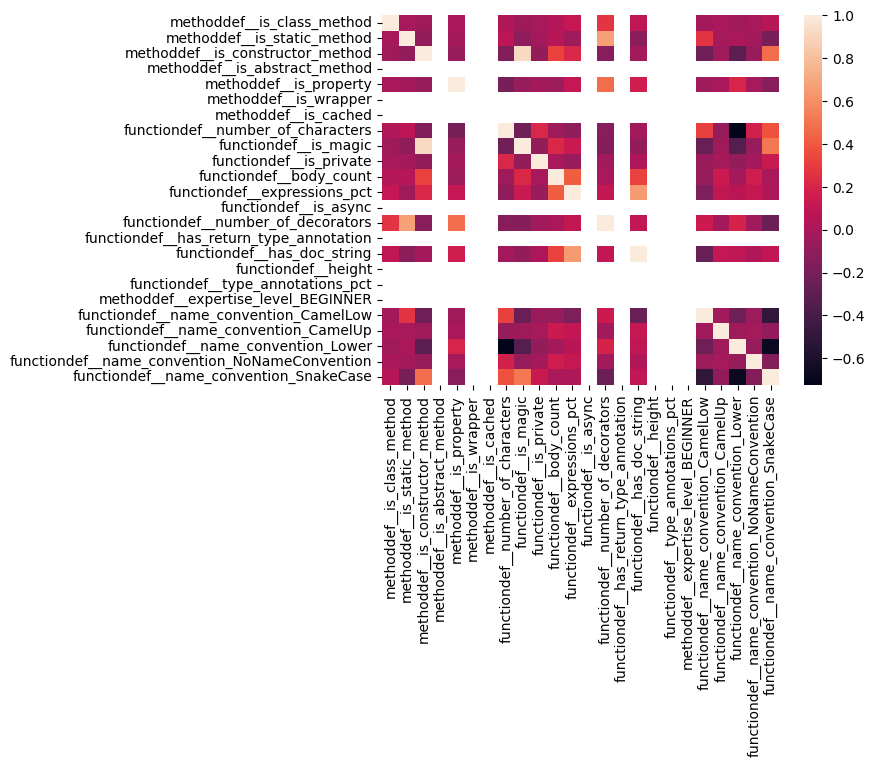

In [10]:
sns.heatmap(X.corr(method='spearman'), annot=False)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 19 variable (12 booleanas, 4 numericas, 2 porcentuales y 1 categorica) se hara un analisis detallado

### Variable is_class_method (1/19)
Esta variable es de tipo booleano y representa si el método es de clase.

<Axes: xlabel='methoddef__is_class_method', ylabel='Count'>

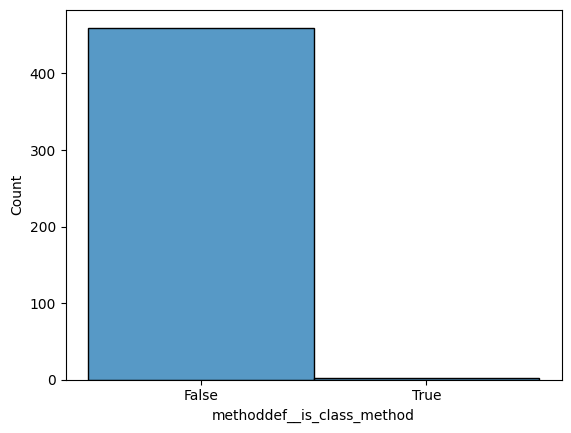

In [11]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_class_method'], discrete=True)

In [12]:
num_true_values = len(X[X['methoddef__is_class_method'] == True])
num_false_values = len(X[X['methoddef__is_class_method'] == False])
std = X['methoddef__is_class_method'].std()
freq_true = len(X[X['methoddef__is_class_method'] == True]) / len(X['methoddef__is_class_method'])
freq_false = len(X[X['methoddef__is_class_method'] == False]) / len(X['methoddef__is_class_method'])
print(f'La variable is_class_method contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_class_method a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_class_method a False es {freq_false}.')

La variable is_class_method contiene 2 valores verdaderos y 460 valores falsos. Y, la desviación típica es de 0.06572376936674118
La frecuencia con la que programa puede tener la variable is_class_method a True es 0.004329004329004329.
La frecuencia con la que programa puede tener la variable is_class_method a False es 0.9956709956709957.


In [13]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_class_method', possible_values)

La variable methoddef__is_class_method contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_class_method toma el valor de 0.0 en un 99.57% de los items.
La variable methoddef__is_class_method toma el valor de 1.0 en un 0.4329% de los items.


In [14]:
X[X['methoddef__is_class_method'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
mean,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
25%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
50%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
75%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
max,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Variable is_static_method (2/19)
Esta variable es de tipo booleano y representa si el método es estático.

<Axes: xlabel='methoddef__is_static_method', ylabel='Count'>

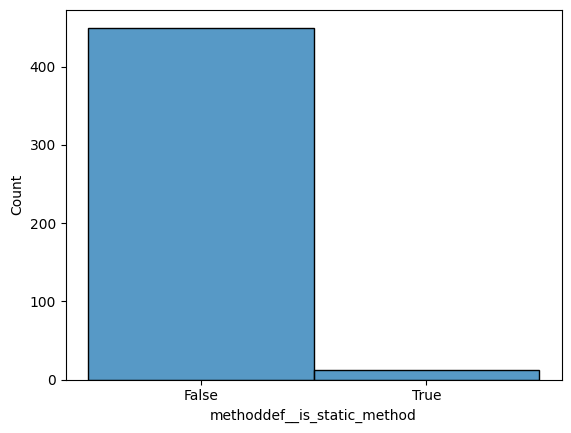

In [15]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_static_method'], discrete=True)

In [16]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_static_method'] == True])
num_false_values = len(X[X['methoddef__is_static_method'] == False])
std = X['methoddef__is_static_method'].std()
freq_true = len(X[X['methoddef__is_static_method'] == True]) / len(X['methoddef__is_static_method'])
freq_false = len(X[X['methoddef__is_static_method'] == False]) / len(X['methoddef__is_static_method'])
print(f'La variable is_static_method contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_static_method a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_static_method a False es {freq_false}.')

La variable is_static_method contiene 12 valores verdaderos y 450 valores falsos. Y, la desviación típica es de 0.15923018753528595
La frecuencia con la que programa puede tener la variable is_static_method a True es 0.025974025974025976.
La frecuencia con la que programa puede tener la variable is_static_method a False es 0.974025974025974.


In [17]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_static_method', possible_values)

La variable methoddef__is_static_method contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_static_method toma el valor de 0.0 en un 97.4% de los items.
La variable methoddef__is_static_method toma el valor de 1.0 en un 2.597% de los items.


In [18]:
X[X['methoddef__is_static_method'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,12.0,12.0,12.0,12.0,12.0,12.0,12.0,12.000000,12.0,12.0,...,12.0,12.0,12.0,12.0,12.0,12.000000,12.0,12.000000,12.0,12.0
mean,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.500000,0.0,0.0,...,0.0,0.0,2.0,0.0,1.0,0.750000,0.0,0.250000,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.343923,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.452267,0.0,0.452267,0.0,0.0
min,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.000000,0.0,0.0,...,0.0,0.0,2.0,0.0,1.0,0.000000,0.0,0.000000,0.0,0.0
25%,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10.000000,0.0,0.0,...,0.0,0.0,2.0,0.0,1.0,0.750000,0.0,0.000000,0.0,0.0
50%,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.500000,0.0,0.0,...,0.0,0.0,2.0,0.0,1.0,1.000000,0.0,0.000000,0.0,0.0
75%,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.000000,0.0,0.0,...,0.0,0.0,2.0,0.0,1.0,1.000000,0.0,0.250000,0.0,0.0
max,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.000000,0.0,0.0,...,0.0,0.0,2.0,0.0,1.0,1.000000,0.0,1.000000,0.0,0.0


### Variable is_constructor_method (3/19)
Esta variable es booleana y representa si el método es un constructor (__ init __).

<Axes: xlabel='methoddef__is_constructor_method', ylabel='Count'>

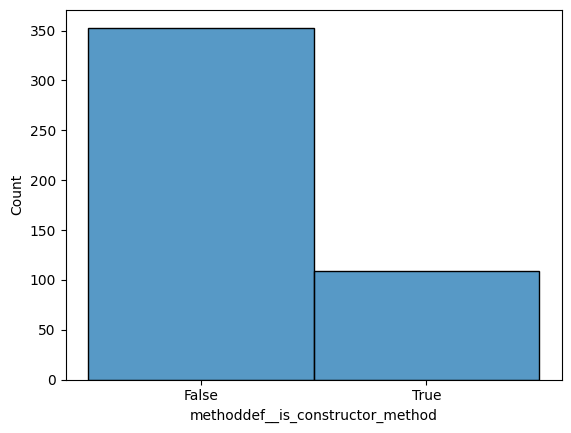

In [19]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_constructor_method'], discrete=True)

In [20]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_constructor_method'] == True])
num_false_values = len(X[X['methoddef__is_constructor_method'] == False])
std = X['methoddef__is_constructor_method'].std()
freq_true = len(X[X['methoddef__is_constructor_method'] == True]) / len(X['methoddef__is_constructor_method'])
freq_false = len(X[X['methoddef__is_constructor_method'] == False]) / len(X['methoddef__is_constructor_method'])
print(f'La variable is_constructor_method contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_constructor_method a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_constructor_method a False es {freq_false}.')

La variable is_constructor_method contiene 109 valores verdaderos y 353 valores falsos. Y, la desviación típica es de 0.4250393509864807
La frecuencia con la que programa puede tener la variable is_constructor_method a True es 0.23593073593073594.
La frecuencia con la que programa puede tener la variable is_constructor_method a False es 0.7640692640692641.


In [21]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_constructor_method', possible_values)

La variable methoddef__is_constructor_method contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_constructor_method toma el valor de 0.0 en un 76.41% de los items.
La variable methoddef__is_constructor_method toma el valor de 1.0 en un 23.59% de los items.


In [22]:
X[X['methoddef__is_constructor_method'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,109.0,109.0,109.0,109.0,109.0,109.0,109.0,109.0,109.0,109.0,...,109.0,109.000000,109.0,109.0,109.0,109.0,109.0,109.0,109.0,109.0
mean,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,...,0.0,0.330275,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.472484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,...,0.0,0.000000,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
25%,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,...,0.0,0.000000,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
50%,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,...,0.0,0.000000,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
75%,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,...,0.0,1.000000,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
max,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,...,0.0,1.000000,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Variable is_abstract_method (4/19)
Esta variable es booleana y representa si el método es abstracto.

<Axes: xlabel='methoddef__is_abstract_method', ylabel='Count'>

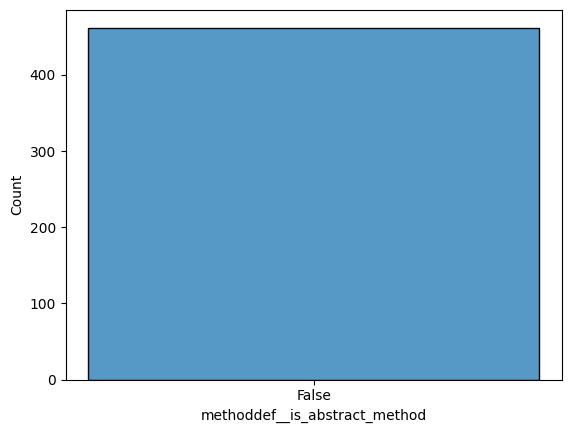

In [23]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_abstract_method'], discrete=True)

In [24]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_abstract_method'] == True])
num_false_values = len(X[X['methoddef__is_abstract_method'] == False])
std = X['methoddef__is_abstract_method'].std()
freq_true = len(X[X['methoddef__is_abstract_method'] == True]) / len(X['methoddef__is_abstract_method'])
freq_false = len(X[X['methoddef__is_abstract_method'] == False]) / len(X['methoddef__is_abstract_method'])
print(f'La variable is_abstract_method contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_abstract_method a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_abstract_method a False es {freq_false}.')

La variable is_abstract_method contiene 0 valores verdaderos y 462 valores falsos. Y, la desviación típica es de 0.0
La frecuencia con la que programa puede tener la variable is_abstract_method a True es 0.0.
La frecuencia con la que programa puede tener la variable is_abstract_method a False es 1.0.


In [25]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_abstract_method', possible_values)

La variable methoddef__is_abstract_method contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_abstract_method toma el valor de 0.0 en un 100.0% de los items.
La variable methoddef__is_abstract_method toma el valor de True en un 0.0% de los items. [OUTLIER]


In [26]:
X[X['methoddef__is_abstract_method'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variable is_property (5/19)
Esta variable es booleana y representa si el método es property.

<Axes: xlabel='methoddef__is_property', ylabel='Count'>

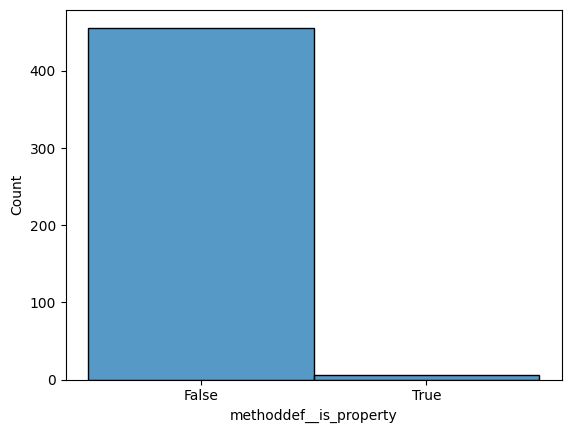

In [27]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_property'], discrete=True)

In [28]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_property'] == True])
num_false_values = len(X[X['methoddef__is_property'] == False])
std = X['methoddef__is_property'].std()
freq_true = len(X[X['methoddef__is_property'] == True]) / len(X['methoddef__is_property'])
freq_false = len(X[X['methoddef__is_property'] == False]) / len(X['methoddef__is_property'])
print(f'La variable is_property contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_property a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_property a False es {freq_false}.')

La variable is_property contiene 6 valores verdaderos y 456 valores falsos. Y, la desviación típica es de 0.11334088444709778
La frecuencia con la que programa puede tener la variable is_property a True es 0.012987012987012988.
La frecuencia con la que programa puede tener la variable is_property a False es 0.987012987012987.


In [29]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_property', possible_values)

La variable methoddef__is_property contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_property toma el valor de 0.0 en un 98.7% de los items.
La variable methoddef__is_property toma el valor de 1.0 en un 1.299% de los items.


In [30]:
X[X['methoddef__is_property'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.000000,6.0,6.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
mean,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.333333,0.0,0.0,...,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.516398,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.0,0.0,...,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.0,0.0,...,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.0,0.0,...,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.750000,0.0,0.0,...,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
max,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.000000,0.0,0.0,...,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Variable is_wrapper (6/19)
Esta variable es booleana y representa si el método es wrapper.

<Axes: xlabel='methoddef__is_wrapper', ylabel='Count'>

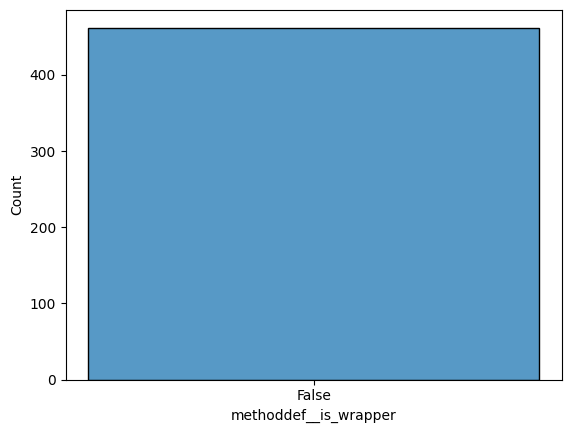

In [31]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_wrapper'], discrete=True)

In [32]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_wrapper'] == True])
num_false_values = len(X[X['methoddef__is_wrapper'] == False])
std = X['methoddef__is_wrapper'].std()
freq_true = len(X[X['methoddef__is_wrapper'] == True]) / len(X['methoddef__is_wrapper'])
freq_false = len(X[X['methoddef__is_wrapper'] == False]) / len(X['methoddef__is_wrapper'])
print(f'La variable is_wrapper contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_wrapper a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_wrapper a False es {freq_false}.')

La variable is_wrapper contiene 0 valores verdaderos y 462 valores falsos. Y, la desviación típica es de 0.0
La frecuencia con la que programa puede tener la variable is_wrapper a True es 0.0.
La frecuencia con la que programa puede tener la variable is_wrapper a False es 1.0.


In [33]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_wrapper', possible_values)

La variable methoddef__is_wrapper contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_wrapper toma el valor de 0.0 en un 100.0% de los items.
La variable methoddef__is_wrapper toma el valor de True en un 0.0% de los items. [OUTLIER]


In [34]:
X[X['methoddef__is_wrapper'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### IMPORTANTE
No hay ninguna función que sea wrapper.

### Variable is_cached (7/19)
Esta variable es booleana y representa si el método es cached.

<Axes: xlabel='methoddef__is_cached', ylabel='Count'>

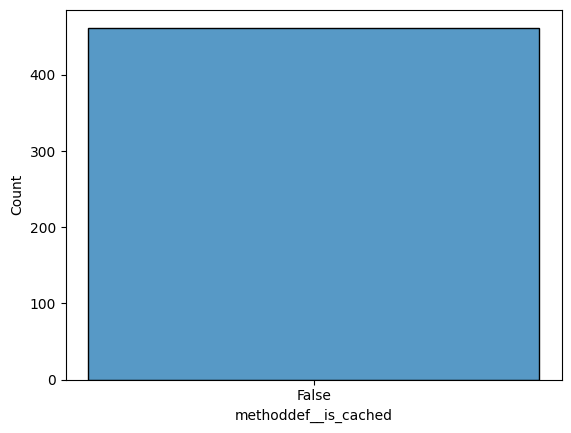

In [35]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['methoddef__is_cached'], discrete=True)

In [36]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['methoddef__is_cached'] == True])
num_false_values = len(X[X['methoddef__is_cached'] == False])
std = X['methoddef__is_cached'].std()
freq_true = len(X[X['methoddef__is_cached'] == True]) / len(X['methoddef__is_cached'])
freq_false = len(X[X['methoddef__is_cached'] == False]) / len(X['methoddef__is_cached'])
print(f'La variable is_cached contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_cached a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_cached a False es {freq_false}.')

La variable is_cached contiene 0 valores verdaderos y 462 valores falsos. Y, la desviación típica es de 0.0
La frecuencia con la que programa puede tener la variable is_cached a True es 0.0.
La frecuencia con la que programa puede tener la variable is_cached a False es 1.0.


In [37]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'methoddef__is_cached', possible_values)

La variable methoddef__is_cached contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable methoddef__is_cached toma el valor de 0.0 en un 100.0% de los items.
La variable methoddef__is_cached toma el valor de True en un 0.0% de los items. [OUTLIER]


In [38]:
X[X['methoddef__is_cached'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### IMPORTANTE
No hay ninguna función que sea cached.

### Variable is_private (8/19)
Esta variable es de tipo booleano y representa si la función es privada.

<Axes: xlabel='functiondef__is_private', ylabel='Count'>

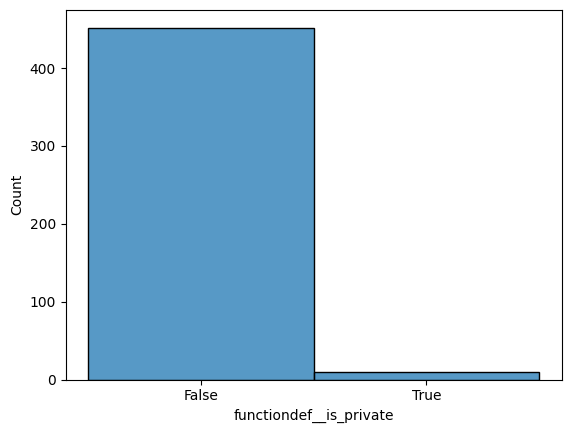

In [39]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_private'], discrete=True)

In [40]:
num_true_values = len(X[X['functiondef__is_private'] == True])
num_false_values = len(X[X['functiondef__is_private'] == False])
std = X['functiondef__is_private'].std()
freq_true = len(X[X['functiondef__is_private'] == True]) / len(X['functiondef__is_private'])
freq_false = len(X[X['functiondef__is_private'] == False]) / len(X['functiondef__is_private'])
print(f'La variable is_private contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_private a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_private a False es {freq_false}.')

La variable is_private contiene 10 valores verdaderos y 452 valores falsos. Y, la desviación típica es de 0.1456792652606964
La frecuencia con la que programa puede tener la variable is_private a True es 0.021645021645021644.
La frecuencia con la que programa puede tener la variable is_private a False es 0.9783549783549783.


In [41]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_private', possible_values)

La variable functiondef__is_private contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_private toma el valor de 0.0 en un 97.84% de los items.
La variable functiondef__is_private toma el valor de 1.0 en un 2.165% de los items.


In [42]:
X[X['functiondef__is_private'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,10.0,10.0,...,10.0,10.000000,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.799999,0.0,1.0,...,0.0,0.400000,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.149935,0.0,0.0,...,0.0,0.516398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.000000,0.0,1.0,...,0.0,0.000000,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.000000,0.0,1.0,...,0.0,0.000000,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.000000,0.0,1.0,...,0.0,0.000000,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.000000,0.0,1.0,...,0.0,1.000000,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.000000,0.0,1.0,...,0.0,1.000000,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Variable is_magic (9/19)
Esta variable es de tipo booleano y representa si la función es de la forma __\w__.

<Axes: xlabel='functiondef__is_magic', ylabel='Count'>

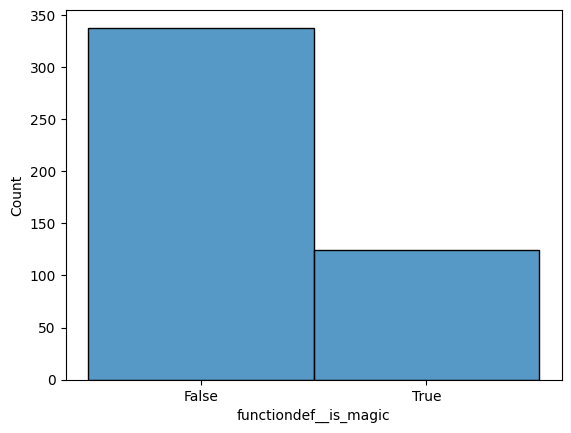

In [43]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_magic'], discrete=True)

In [44]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__is_magic'] == True])
num_false_values = len(X[X['functiondef__is_magic'] == False])
std = X['functiondef__is_magic'].std()
freq_true = len(X[X['functiondef__is_magic'] == True]) / len(X['functiondef__is_magic'])
freq_false = len(X[X['functiondef__is_magic'] == False]) / len(X['functiondef__is_magic'])
print(f'La variable is_magic contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_magic a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_magic a False es {freq_false}.')

La variable is_magic contiene 124 valores verdaderos y 338 valores falsos. Y, la desviación típica es de 0.44360634684562683
La frecuencia con la que programa puede tener la variable is_magic a True es 0.2683982683982684.
La frecuencia con la que programa puede tener la variable is_magic a False es 0.7316017316017316.


In [45]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_magic', possible_values)

La variable functiondef__is_magic contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_magic toma el valor de 0.0 en un 73.16% de los items.
La variable functiondef__is_magic toma el valor de 1.0 en un 26.84% de los items.


In [46]:
X[X['functiondef__is_magic'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,124.0,124.0,124.000000,124.0,124.0,124.0,124.0,124.000000,124.0,124.0,...,124.0,124.000000,124.0,124.0,124.0,124.0,124.0,124.0,124.0,124.0
mean,0.0,0.0,0.879032,0.0,0.0,0.0,0.0,7.854839,1.0,0.0,...,0.0,0.290323,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
std,0.0,0.0,0.327413,0.0,0.0,0.0,0.0,0.471868,0.0,0.0,...,0.0,0.455753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,6.000000,1.0,0.0,...,0.0,0.000000,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
25%,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,8.000000,1.0,0.0,...,0.0,0.000000,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
50%,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,8.000000,1.0,0.0,...,0.0,0.000000,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
75%,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,8.000000,1.0,0.0,...,0.0,1.000000,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
max,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,8.000000,1.0,0.0,...,0.0,1.000000,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Variable is_async (10/19)
Esta variable es booleana y representa si la función es asincrona.

<Axes: xlabel='functiondef__is_async', ylabel='Count'>

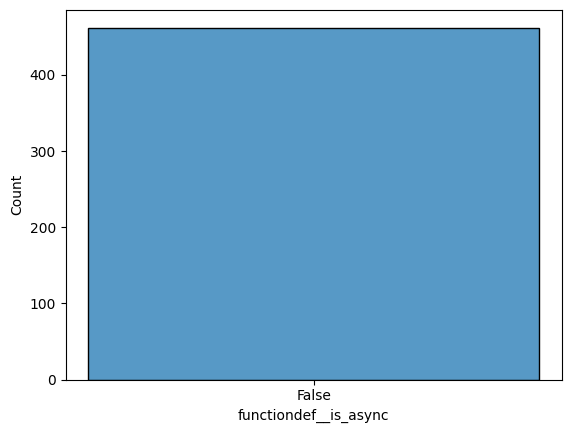

In [47]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_async'], discrete=True)

In [48]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__is_async'] == True])
num_false_values = len(X[X['functiondef__is_async'] == False])
std = X['functiondef__is_async'].std()
freq_true = len(X[X['functiondef__is_async'] == True]) / len(X['functiondef__is_async'])
freq_false = len(X[X['functiondef__is_async'] == False]) / len(X['functiondef__is_async'])
print(f'La variable is_async contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_async a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_async a False es {freq_false}.')

La variable is_async contiene 0 valores verdaderos y 462 valores falsos. Y, la desviación típica es de 0.0
La frecuencia con la que programa puede tener la variable is_async a True es 0.0.
La frecuencia con la que programa puede tener la variable is_async a False es 1.0.


In [49]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_async', possible_values)

La variable functiondef__is_async contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_async toma el valor de 0.0 en un 100.0% de los items.
La variable functiondef__is_async toma el valor de True en un 0.0% de los items. [OUTLIER]


In [50]:
X[X['functiondef__is_async'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variable has_return_type_annotation (11/19)
Esta variable es booleana y representa si la function tiene una anotacion del tipo de retorno.

<Axes: xlabel='functiondef__has_return_type_annotation', ylabel='Count'>

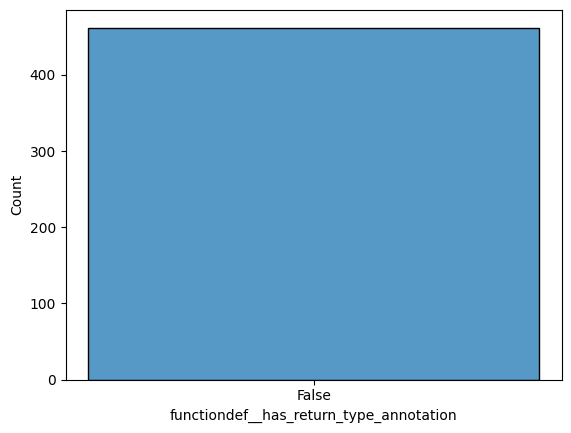

In [51]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__has_return_type_annotation'], discrete=True)

In [52]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__has_return_type_annotation'] == True])
num_false_values = len(X[X['functiondef__has_return_type_annotation'] == False])
std = X['functiondef__has_return_type_annotation'].std()
freq_true = len(X[X['functiondef__has_return_type_annotation'] == True]) / len(X['functiondef__has_return_type_annotation'])
freq_false = len(X[X['functiondef__has_return_type_annotation'] == False]) / len(X['functiondef__has_return_type_annotation'])
print(f'La variable has_return_type_annotation contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_return_type_annotation a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_return_type_annotation a False es {freq_false}.')

La variable has_return_type_annotation contiene 0 valores verdaderos y 462 valores falsos. Y, la desviación típica es de 0.0
La frecuencia con la que programa puede tener la variable has_return_type_annotation a True es 0.0.
La frecuencia con la que programa puede tener la variable has_return_type_annotation a False es 1.0.


In [53]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__has_return_type_annotation', possible_values)

La variable functiondef__has_return_type_annotation contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__has_return_type_annotation toma el valor de 0.0 en un 100.0% de los items.
La variable functiondef__has_return_type_annotation toma el valor de True en un 0.0% de los items. [OUTLIER]


In [54]:
X[X['functiondef__has_return_type_annotation'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variable has_doc_string (12/19)
Esta variable es booleana y representa si la function comienza por un String plano a modo de comentario.

<Axes: xlabel='functiondef__has_doc_string', ylabel='Count'>

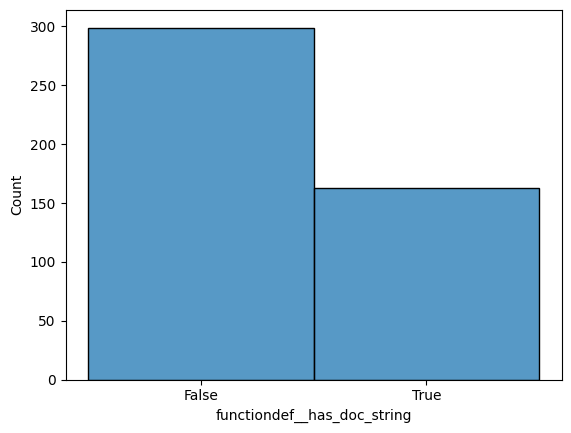

In [55]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__has_doc_string'], discrete=True)

In [56]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__has_doc_string'] == True])
num_false_values = len(X[X['functiondef__has_doc_string'] == False])
std = X['functiondef__has_doc_string'].std()
freq_true = len(X[X['functiondef__has_doc_string'] == True]) / len(X['functiondef__has_doc_string'])
freq_false = len(X[X['functiondef__has_doc_string'] == False]) / len(X['functiondef__has_doc_string'])
print(f'La variable has_doc_string contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a False es {freq_false}.')

La variable has_doc_string contiene 163 valores verdaderos y 299 valores falsos. Y, la desviación típica es de 0.47836339473724365
La frecuencia con la que programa puede tener la variable has_doc_string a True es 0.3528138528138528.
La frecuencia con la que programa puede tener la variable has_doc_string a False es 0.6471861471861472.


In [57]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__has_doc_string', possible_values)

La variable functiondef__has_doc_string contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__has_doc_string toma el valor de 0.0 en un 64.72% de los items.
La variable functiondef__has_doc_string toma el valor de 1.0 en un 35.28% de los items.


In [58]:
X[X['functiondef__has_doc_string'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,163.000000,163.0,163.000000,163.0,163.000000,163.0,163.0,163.000000,163.000000,163.000000,...,163.0,163.0,163.0,163.0,163.0,163.000000,163.000000,163.000000,163.000000,163.000000
mean,0.012270,0.0,0.220859,0.0,0.036810,0.0,0.0,10.754601,0.220859,0.024540,...,0.0,1.0,2.0,0.0,1.0,0.024540,0.018405,0.294479,0.018405,0.644172
std,0.110427,0.0,0.416104,0.0,0.188875,0.0,0.0,7.402946,0.416104,0.155195,...,0.0,0.0,0.0,0.0,0.0,0.155195,0.134825,0.457213,0.134825,0.480239
min,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,1.000000,0.000000,0.000000,...,0.0,1.0,2.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,6.000000,0.000000,0.000000,...,0.0,1.0,2.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,8.000000,0.000000,0.000000,...,0.0,1.0,2.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,14.000000,0.000000,0.000000,...,0.0,1.0,2.0,0.0,1.0,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,37.000000,1.000000,1.000000,...,0.0,1.0,2.0,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable number_of_characters (13/19)
Esta variable representa el número de caracteres que tiene el nombre de la funcion. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 37. Con una media de 10.2.

<Axes: ylabel='functiondef__number_of_characters'>

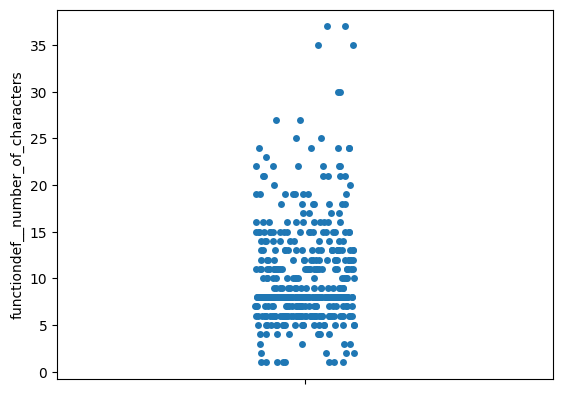

In [59]:
sns.stripplot(X['functiondef__number_of_characters'])

In [60]:
print_outliers_for_df_column(X, 'functiondef__number_of_characters')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.49981962309943306
Rango valores atípicos extremos (Tukey): [-8.0,27.0]
Rango valores atípicos leves (Tukey): [-0.5,19.5]
Rango valores atípicos extremos (Fixed BoxPlot): [5.695872363202317,67.37795071193688]
-3.0IQR: 0 instancias tienen un valor para functiondef__number_of_characters inferior a -8.0 (Q1-3*IQR) para functiondef__number_of_characters. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__number_of_characters inferior a -0.5 (Q1-1.5*IQR) para functiondef__number_of_characters. Representando un 0.0% del total de instancias.
+1.5IQR: 30 instancias tienen un valor para functiondef__number_of_characters superior a 19.5 (Q3+1.5*IQR) para functiondef__number_of_characters. Representando un 6.494% del total de instancias.
+3.0IQR: 6 instancias tienen un valor para functiondef__number_of_characters superior a 27.0 (Q3-3*IQR) para functiondef__number_of_characters. Represen

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 19.5 (Con un MC de 49 usamos Tuckey)

In [61]:
X[X['functiondef__number_of_characters'] > 19.5].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.000000,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.000000,0.0,0.0,...,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.154701,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.000000,0.0,0.0,...,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.000000,0.0,0.0,...,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.000000,0.0,0.0,...,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.000000,0.0,0.0,...,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.000000,0.0,0.0,...,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Variable body_count (14/19)
Esta variable representa el número de sentencias en el root de la función. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 65. Con una media de 4.97.

<Axes: ylabel='functiondef__body_count'>

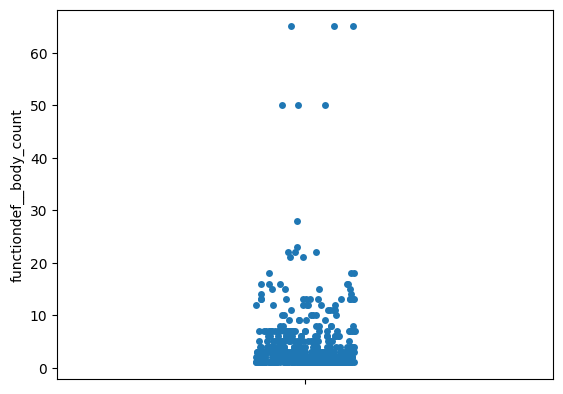

In [62]:
sns.stripplot(X['functiondef__body_count'])

### IMPORTANTE
Los valores máximos están muy alejados del siguiente.

In [63]:
print_outliers_for_df_column(X, 'functiondef__body_count')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7231787814786614
Rango valores atípicos extremos (Tukey): [-14.0,21.0]
Rango valores atípicos leves (Tukey): [-6.5,13.5]
Rango valores atípicos extremos (Fixed BoxPlot): [0.4032295316430633,141.31672563992433]
-3.0IQR: 0 instancias tienen un valor para functiondef__body_count inferior a -14.0 (Q1-3*IQR) para functiondef__body_count. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__body_count inferior a -6.5 (Q1-1.5*IQR) para functiondef__body_count. Representando un 0.0% del total de instancias.
+1.5IQR: 27 instancias tienen un valor para functiondef__body_count superior a 13.5 (Q3+1.5*IQR) para functiondef__body_count. Representando un 5.844% del total de instancias.
+3.0IQR: 11 instancias tienen un valor para functiondef__body_count superior a 21.0 (Q3-3*IQR) para functiondef__body_count. Representando un 2.381% del total de instancias.
L: 0 instancias tienen un valor par

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 21 (Con un MC de 72 usamos Tukey Extremo)

In [83]:
X[X['functiondef__body_count'] > 21].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.000000,11.0,11.0,...,11.0,11.000000,11.0,11.0,11.0,11.000000,11.000000,11.0,11.0,11.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.636364,0.0,0.0,...,0.0,0.636364,2.0,0.0,1.0,0.454545,0.272727,0.0,0.0,0.272727
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.139195,0.0,0.0,...,0.0,0.504525,0.0,0.0,0.0,0.522233,0.467099,0.0,0.0,0.467099
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000,0.0,0.0,...,0.0,0.000000,2.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.500000,0.0,0.0,...,0.0,0.000000,2.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.000000,0.0,0.0,...,0.0,1.000000,2.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.000000,0.0,0.0,...,0.0,1.000000,2.0,0.0,1.0,1.000000,0.500000,0.0,0.0,0.500000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.000000,0.0,0.0,...,0.0,1.000000,2.0,0.0,1.0,1.000000,1.000000,0.0,0.0,1.000000


### Variable number_of_decorators (15/19)
Esta variable representa el número de decoradores de la funcion. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 1. Con una media de 0.056.

<Axes: ylabel='functiondef__number_of_decorators'>

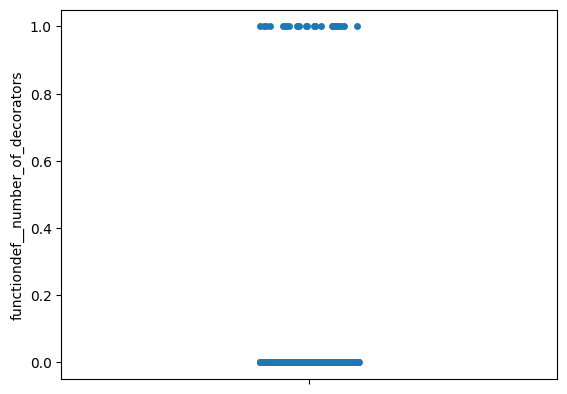

In [65]:
sns.stripplot(X['functiondef__number_of_decorators'])

In [66]:
print_outliers_for_df_column(X, 'functiondef__number_of_decorators')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8498943187402986
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para functiondef__number_of_decorators inferior a 0.0 (Q1-3*IQR) para functiondef__number_of_decorators. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__number_of_decorators inferior a 0.0 (Q1-1.5*IQR) para functiondef__number_of_decorators. Representando un 0.0% del total de instancias.
+1.5IQR: 26 instancias tienen un valor para functiondef__number_of_decorators superior a 0.0 (Q3+1.5*IQR) para functiondef__number_of_decorators. Representando un 5.628% del total de instancias.
+3.0IQR: 26 instancias tienen un valor para functiondef__number_of_decorators superior a 0.0 (Q3-3*IQR) para functiondef__number_of_decorators. Representando un 5.628% del total de instanc

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [67]:
X[X['functiondef__number_of_decorators'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,26.000000,26.000000,26.0,26.0,26.000000,26.0,26.0,26.000000,26.0,26.0,...,26.0,26.000000,26.0,26.0,26.0,26.000000,26.0,26.000000,26.0,26.000000
mean,0.076923,0.461538,0.0,0.0,0.230769,0.0,0.0,6.692307,0.0,0.0,...,0.0,0.538462,2.0,0.0,1.0,0.346154,0.0,0.576923,0.0,0.076923
std,0.271746,0.508391,0.0,0.0,0.429669,0.0,0.0,5.548111,0.0,0.0,...,0.0,0.508391,0.0,0.0,0.0,0.485165,0.0,0.503832,0.0,0.271746
min,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,...,0.0,0.000000,2.0,0.0,1.0,0.000000,0.0,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,...,0.0,0.000000,2.0,0.0,1.0,0.000000,0.0,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,7.000000,0.0,0.0,...,0.0,1.000000,2.0,0.0,1.0,0.000000,0.0,1.000000,0.0,0.000000
75%,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,11.000000,0.0,0.0,...,0.0,1.000000,2.0,0.0,1.0,1.000000,0.0,1.000000,0.0,0.000000
max,1.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,16.000000,0.0,0.0,...,0.0,1.000000,2.0,0.0,1.0,1.000000,0.0,1.000000,0.0,1.000000


### Variable height (16/19)
Esta variable representa la distancia desde la función hasta el root del módulo (fichero). Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 2 - 2. Con una media de 2.

<Axes: ylabel='functiondef__height'>

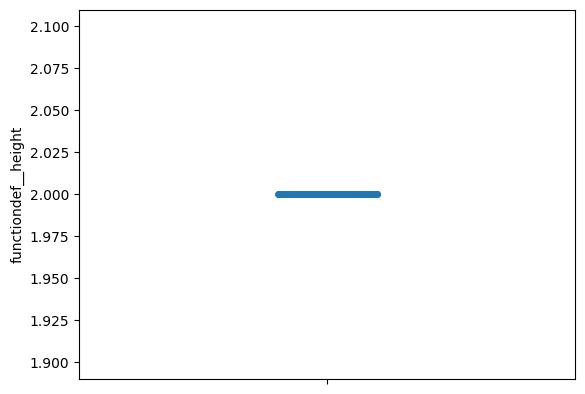

In [68]:
sns.stripplot(X['functiondef__height'])

In [69]:
print_outliers_for_df_column(X, 'functiondef__height')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.0
Rango valores atípicos extremos (Tukey): [2.0,2.0]
Rango valores atípicos leves (Tukey): [2.0,2.0]
Rango valores atípicos extremos (Fixed BoxPlot): [2.0,2.0]
-3.0IQR: 0 instancias tienen un valor para functiondef__height inferior a 2.0 (Q1-3*IQR) para functiondef__height. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__height inferior a 2.0 (Q1-1.5*IQR) para functiondef__height. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para functiondef__height superior a 2.0 (Q3+1.5*IQR) para functiondef__height. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para functiondef__height superior a 2.0 (Q3-3*IQR) para functiondef__height. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un valor para functiondef__height inferior a 2.0 para functiondef__height. Representando un 0.0% del tota

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 2 (Todos los umbrales son 2)

In [70]:
X[X['functiondef__height'] > 2].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variable expressions_pct (17/19)
Esta variable representa la proporción de las sentencias en el root de la funcsion que son expresiones. Toma los valores de 0.0 - 1.0. La media es 0.29.

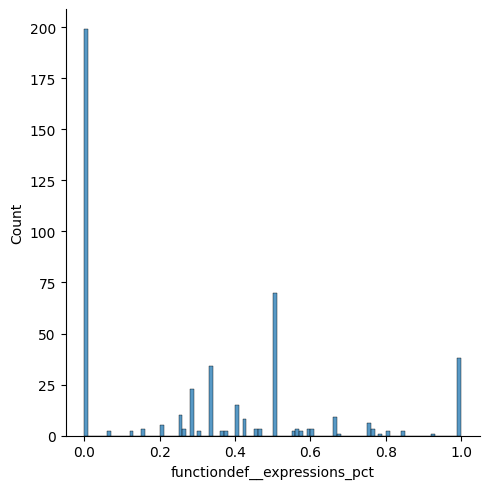

In [71]:
sns.displot(X['functiondef__expressions_pct'], bins=[i / 100 for i in range(0, 101)])

In [72]:
print_outliers_for_df_column(X, 'functiondef__expressions_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6014222099614299
Rango valores atípicos extremos (Tukey): [-1.5,2.0]
Rango valores atípicos leves (Tukey): [-0.75,1.25]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.09138629040725132,8.814548131516897]
-3.0IQR: 0 instancias tienen un valor para functiondef__expressions_pct inferior a -1.5 (Q1-3*IQR) para functiondef__expressions_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__expressions_pct inferior a -0.75 (Q1-1.5*IQR) para functiondef__expressions_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para functiondef__expressions_pct superior a 1.25 (Q3+1.5*IQR) para functiondef__expressions_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para functiondef__expressions_pct superior a 2.0 (Q3-3*IQR) para functiondef__expressions_pct. Representando un 0.0% del total de instancias.
L:

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 1.25 (Con un MC de 60 usamos Tuckey)

In [84]:
X[X['functiondef__expressions_pct'] > 1.25].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variable type_annotations_pct (18/19)
Esta variable representa la proporción de los parámetros que tienen anotación de tipo en la función (incluyendo el return). Este campo toma valores del 0.0 - 0. Su media es 0.

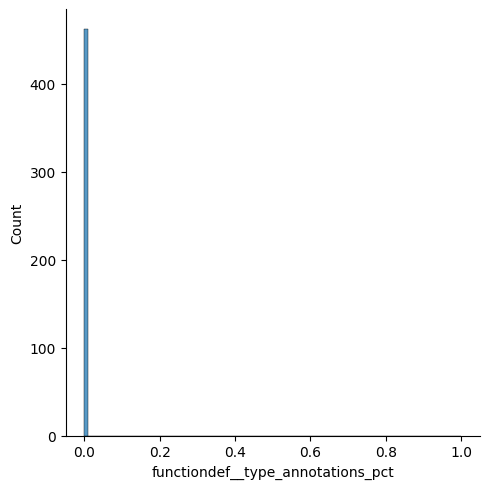

In [74]:
sns.displot(X['functiondef__type_annotations_pct'], bins=[i / 100 for i in range(0, 101)])

In [75]:
print_outliers_for_df_column(X, 'functiondef__type_annotations_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para functiondef__type_annotations_pct inferior a 0.0 (Q1-3*IQR) para functiondef__type_annotations_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__type_annotations_pct inferior a 0.0 (Q1-1.5*IQR) para functiondef__type_annotations_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para functiondef__type_annotations_pct superior a 0.0 (Q3+1.5*IQR) para functiondef__type_annotations_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para functiondef__type_annotations_pct superior a 0.0 (Q3-3*IQR) para functiondef__type_annotations_pct. Representando un 0.0% del total de instancias.
L: 0 instancias 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.0 (Todos los umbrales son 0)

In [76]:
X[X['functiondef__type_annotations_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,...,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,methoddef__expertise_level_BEGINNER,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Importante
El 79% de los metodos no tienen anotaciones de tipo.

### Variable name_convention (19/19)
Esta variable es de tipo categórica y representa la name_convention del nombre del método.

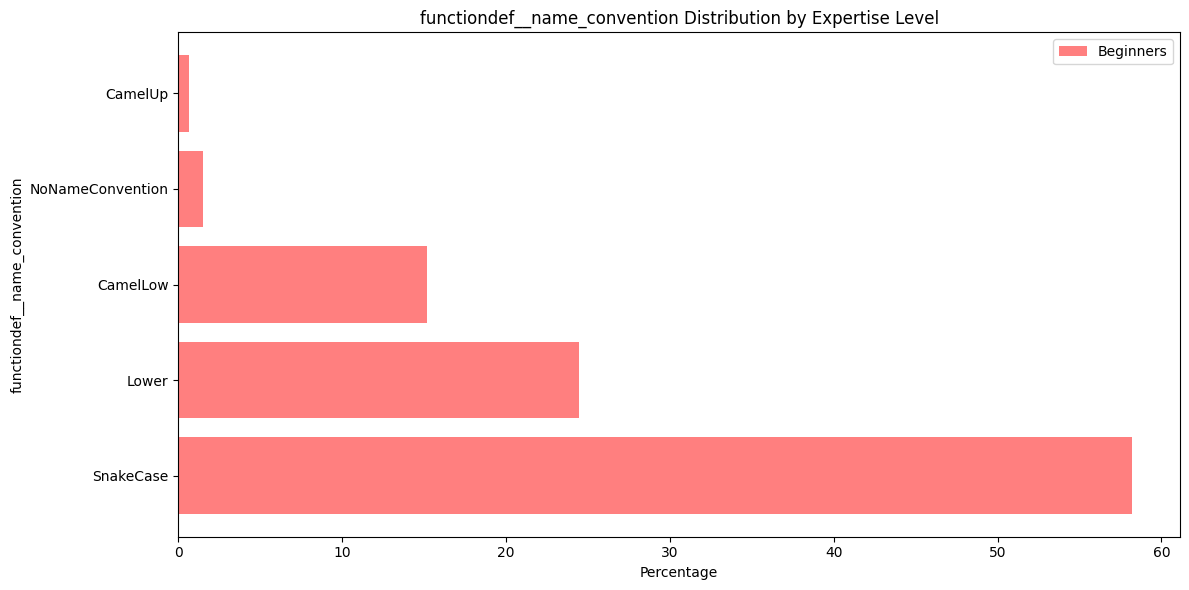

In [77]:
print_categorical_histogram(full_table, 'functiondef__name_convention',TARGET_FEATURE, include_all=False, include_experts=False)

In [78]:
print_frequency_anal_for_cat_var(full_table, 'functiondef__name_convention')

La variable functiondef__name_convention contiene 5 valores distintos.
El umbral de outlier es de 0.04%
La variable functiondef__name_convention toma el valor de SnakeCase en un 58.23% de los items.
La variable functiondef__name_convention toma el valor de Lower en un 24.46% de los items.
La variable functiondef__name_convention toma el valor de CamelLow en un 15.15% de los items.
La variable functiondef__name_convention toma el valor de NoNameConvention en un 1.515% de los items.
La variable functiondef__name_convention toma el valor de CamelUp en un 0.6494% de los items.


In [79]:
print_values_usage_for_cat_var(full_table, 'functiondef__name_convention', NAMING_CONVENTION_VALUES)

La variable functiondef__name_convention puede tomar 7 valores distintos
	5 (71.43%) valores utilizados
	2 (28.57%) valores NO utilizados
		La variable functiondef__name_convention nunca toma valor Discard.
		La variable functiondef__name_convention nunca toma valor Upper.


## Multivariate

Isolation forest algorithm

In [80]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,methoddef__is_class_method,methoddef__is_static_method,methoddef__is_constructor_method,methoddef__is_abstract_method,methoddef__is_property,methoddef__is_wrapper,methoddef__is_cached,methoddef__expertise_level,functiondef__name_convention,functiondef__number_of_characters,functiondef__is_private,functiondef__is_magic,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct


### IMPORTANTE
Hay que analizar los 42 los outliers de la tabla.

In [81]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
methoddef__is_class_method,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_static_method,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_constructor_method,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_abstract_method,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_property,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_wrapper,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
methoddef__is_cached,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__number_of_characters,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__is_magic,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__is_private,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
methoddef__is_class_method,462.0,0.004329,0.065724,0.0,0.0,0.000000,0.0,1.0
methoddef__is_static_method,462.0,0.025974,0.159230,0.0,0.0,0.000000,0.0,1.0
methoddef__is_constructor_method,462.0,0.235931,0.425039,0.0,0.0,0.000000,0.0,1.0
methoddef__is_abstract_method,462.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
methoddef__is_property,462.0,0.012987,0.113341,0.0,0.0,0.000000,0.0,1.0
methoddef__is_wrapper,462.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
methoddef__is_cached,462.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
functiondef__number_of_characters,462.0,10.201299,5.454263,1.0,7.0,8.000000,12.0,37.0
functiondef__is_magic,462.0,0.268398,0.443606,0.0,0.0,0.000000,1.0,1.0
functiondef__is_private,462.0,0.021645,0.145679,0.0,0.0,0.000000,0.0,1.0
